In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

Files:
- metadata: Each row represents the metadata for one unique flight
- waypoints: Each row contains data from one recorded ADS-B waypoint provided at 40-second intervals
- uk-waypoints: Each row contains data from one recorded ADS-B waypoint provided at 1-second intervals

In [5]:
# Scrape all RyanAir flights during the week
metadata_daily = []
wypts_daily = []

for i, day in enumerate(range(1,8)) : 

    print(f'{i+1}/7 Fetching 0{day} July 2021 data ... ')
    clear_output(wait = True)

    df = pd.read_parquet(f'2021-07-0{day}-metadata.pq')
    df.insert(2, 'company', df['flight_number'].apply(lambda x: x[:2]))
    df = df.groupby('company').get_group('U2')
    metadata_daily.append(df)

    df = pd.read_parquet(f'2021-07-0{day}-waypoints.pq')
    df.insert(2, 'company', df['flight_number'].apply(lambda x: x[:2]))
    df = df.groupby('company').get_group('U2')
    wypts_daily.append(df)

metadata = pd.concat(metadata_daily).reset_index(drop = True)
waypoints = pd.concat(wypts_daily).reset_index(drop = True)

del metadata_daily, wypts_daily, df

print('Metadata :', metadata.shape)
print('Waypoints :', waypoints.shape)

Metadata : (4887, 45)
Waypoints : (635730, 11)


In [4]:
metadata

,flight_id,callsign,company,icao_address,flight_number,tail_number,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_airport,destination_airport_name,destination_country,scheduled_departure_time_utc,scheduled_arrival_time_utc,first_waypoint_time,last_waypoint_time,duration_hours,total_distance_km,great_circle_distance_km,longitude_first_waypoint,longitude_last_waypoint,longitude_min,longitude_max,latitude_first_waypoint,latitude_last_waypoint,latitude_min,latitude_max,altitude_first_waypoint,altitude_last_waypoint,altitude_min,altitude_max,n_wypts,n_terrestrial,n_satellites,n_interpolate,n_extrapolate,n_great_circle,extrap_trajectory_start,extrap_trajectory_end,trajectory_complete,great_circle_trajectory,est_origin_airport,est_destination_airport
0,210701-22992-EJU71EF,EJU71EF,U2,440309,U25801,OE-IZD,A320,Jet,EDDB,Berlin Brandenburg Airport,DE,LEPA,Palma de Mallorca Airport,ES,2021-07-01 04:00:00,2021-07-01 06:45:00,2021-07-01 04:04:16.553,2021-07-01 06:19:01.000,2.25,1697.76,1644.395836,13.493889,2.738810,2.74,13.53,52.351389,39.551701,39.55,52.38,157.0,27.0,27.0,37050.0,189,27,0,157,5,0,True,True,True,False,False,False
1,210701-23384-EJU14UL,EJU14UL,U2,440CB1,U24223,OE-IZF,A320,Jet,LFPO,Paris-Orly Airport,FR,LGAV,Athens Eleftherios Venizelos International Air...,GR,2021-07-01 04:00:00,2021-07-01 07:10:00,2021-07-01 04:05:45.000,2021-07-01 06:48:49.000,2.72,2275.96,2105.114978,2.379444,23.944500,2.38,24.10,48.723333,37.936401,37.51,48.72,291.0,308.0,291.0,37050.0,227,32,0,186,9,0,True,True,True,False,False,False
2,210701-22872-EJU81RU,EJU81RU,U2,440175,U22434,OE-IJO,A320,Jet,LIMC,Malpensa International Airport,IT,LGMK,Mikonos Airport,GR,NaT,NaT,2021-07-01 04:08:56.000,2021-07-01 06:14:32.000,2.09,1743.84,1651.548296,8.728110,25.348101,8.73,25.35,45.630600,37.435101,37.02,45.63,768.0,405.0,405.0,37050.0,176,25,0,144,7,0,True,True,True,False,False,False
3,210701-952-EJU1641,EJU1641,U2,44046D,U21641,OE-ICI,A320,Jet,LFMN,Nice-Côte d'Azur Airport,FR,LEIB,Ibiza Airport,ES,2021-07-01 04:00:00,2021-07-01 05:35:00,2021-07-01 04:09:50.744,2021-07-01 05:18:06.000,1.14,755.07,721.887396,7.215870,1.373120,1.37,7.26,43.658401,38.872898,38.87,43.66,12.0,24.0,12.0,39025.0,96,14,0,78,4,0,True,True,True,False,False,False
4,210701-966-EJU72LH,EJU72LH,U2,44083C,U21514,OE-IJQ,A320,Jet,LEPA,Palma de Mallorca Airport,ES,LSGG,Geneva Cointrin International Airport,CH,2021-07-01 04:15:00,2021-07-01 05:55:00,2021-07-01 04:17:39.000,2021-07-01 05:38:30.000,1.35,914.05,792.389641,2.738810,6.108950,2.68,6.74,39.551701,46.238098,39.44,46.38,27.0,1411.0,27.0,38025.0,113,16,0,90,7,0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,210707-38310-EJU68AL,EJU68AL,U2,440484,U21636,OE-LKC,A319,Jet,LIBR,Brindisi Airport,IT,LIMC,Malpensa International Airport,IT,2021-07-07 20:10:00,2021-07-07 21:50:00,2021-07-07 20:44:06.822,2021-07-07 22:05:30.000,1.36,951.64,929.204532,17.947001,8.728110,8.73,17.95,40.657600,45.630600,40.66,45.63,47.0,768.0,47.0,38000.0,114,13,0,95,6,0,True,True,True,False,False,False
4883,210707-36071-EZY138,EZY138,U2,400DB2,U2138,G-EZAO,A319,Jet,EGAA,Belfast International Airport,GB,EGCC,Manchester Airport,GB,2021-07-07 20:45:00,2021-07-07 21:40:00,2021-07-07 20:47:20.000,2021-07-07 21:19:18.000,0.53,327.51,295.475552,-6.215830,-2.279521,-6.22,-2.22,54.657501,53.349375,53.35,54.66,268.0,257.0,257.0,25025.0,44,6,0,30,8,0,True,True,True,False,False,False
4884,210707-93648-EZY63YX,EZY63YX,U2,407835,U23450,G-UZLI,A20N,Jet,LPFR,Faro Airport,PT,EGGD,Bristol Airport,GB,2021-07-07 21:10:00,2021-07-07 23:45:00,2021-07-07 21:00:00.000,2021-07-07 23:30:07.000,2.50,1725.61,1650.597848,-8.038077,-2.723999,-8.04,-2.45,37.025620,51.382486,37.03,51.38,2575.0,475.0,475.0,38050.0,213,28,0,185,0,0,True,False,False,False,False,False
4885,210707

In [6]:
waypoints

,flight_id,callsign,company,flight_number,longitude,latitude,altitude_ft,time,true_airspeed_ms,aircraft_type_icao,source
0,210701-109972-EZY648W,EZY648W,U2,U2466,-4.433060,55.871899,26.000000,2021-07-01 15:27:04,77.681044,A320,e
1,210701-109972-EZY648W,EZY648W,U2,U2466,-4.483065,55.844118,2472.575789,2021-07-01 15:28:01,82.311040,A320,e
2,210701-109972-EZY648W,EZY648W,U2,U2466,-4.582861,55.788494,6125.000000,2021-07-01 15:29:33,139.928768,A320,e
3,210701-109972-EZY648W,EZY648W,U2,U2466,-4.632652,55.760651,6125.000000,2021-07-01 15:30:12,138.899880,A320,t
4,210701-109972-EZY648W,EZY648W,U2,U2466,-4.672732,55.703830,7609.375000,2021-07-01 15:30:52,174.910960,A320,i
...,...,...,...,...,...,...,...,...,...,...,...
635725,210707-94174-EJU58EB,EJU58EB,U2,U22874,8.785177,45.442060,3950.000000,2021-07-07 08:15:01,102.888800,A320,t
635726,210707-94174-EJU58EB,EJU58EB,U2,U22874,8.773794,45.479771,3950.000000,2021-07-07 08:15:36,119.865452,A320,e
635727,210707-94174-EJU58EB,EJU58EB,U2,U22874,8.750983,45.555188,3950.000000,2021-07-07 08:16:49,118.322120,A320,e
635728,210707-94174-EJU58EB,EJU58EB,U2,U22874,8.739554,45.592895,3178.816304,2021-07-07 08:17:25,74.079936,A320,e


# Trajectory plots

In [30]:
def flight_map(start, end, save = False) :   

    metadata_period = metadata[(metadata['first_waypoint_time'] > start) & (metadata['last_waypoint_time'] < end)]
    print(metadata_period.shape)
   
    # From GeoPandas, our world map data
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize = (18, 10))
    worldmap.plot(color = '#ffffff', ax = ax, )

    waypoints_id = waypoints.groupby('flight_id')
    for i, id in enumerate(metadata_period['flight_id']) :
        
        print(str(round(100*(i+1)/len(metadata_period), 2)) + '% ...')

        df = waypoints_id.get_group(id).reset_index(drop = True)
        df = pd.concat([df.head(10), df.iloc[np.arange(11, len(df)-10, 10)], df.tail(10)])
        
        plt.plot(df['longitude'], df['latitude'], color = '#ff671e', alpha = 0.1, linewidth = 0.25)
        clear_output(wait = True)

    ### FIGURE FORMATTING ###
    plt.annotate('easyJet weekly flights', xy = (-26.5, 70), fontname = 'Times', color = '#ff671e', size = 45)
    plt.annotate(start.strftime('%d.%m.%y, %H:%M') + ' - ' + end.strftime('%d.%m.%y, %H:%M'), xy = (-26.5, 67), fontname = 'Times', color = '#ff671e', size = 18)
   # wypts = waypoints[waypoints['flight_id'].isin(metadata_period['flight_id'])]
   # plt.xlim([wypts.longitude.min() - 5, wypts.longitude.max() + 5])
   # plt.ylim([wypts.latitude.min() - 5, wypts.latitude.max() + 5])
    plt.xlim([-27.5, 37.5])
    plt.ylim([25, 75])
    plt.xticks([]), plt.yticks([])
    ax.set_facecolor('#121212')
    if save:
        plt.savefig('easyJet_weekly_map.jpeg', dpi = 300)
        

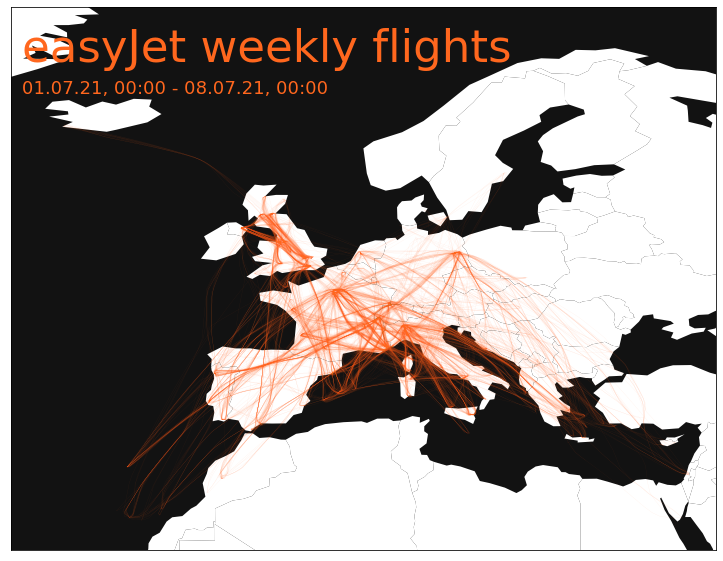

In [31]:
flight_map(datetime(2021,7,1,0,0), datetime(2021,7,8,0,0), save = False)

In [10]:
def flight_map_tail(tail_no, save = False) :   
   
    # From GeoPandas, our world map data
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize = (18, 10))
    worldmap.plot(color = '#0a075c', ax = ax, )

    plane_flights = metadata.groupby('tail_number').get_group(tail_no)
    waypoints_id = waypoints.groupby('flight_id')

    for i, id in enumerate(plane_flights['flight_id']) :
        
        print(str(round(100*(i+1)/len(plane_flights), 2)) + '% ...')

        df = waypoints_id.get_group(id).reset_index(drop = True)
        df = pd.concat([df.head(10), df.iloc[np.arange(11, len(df)-10, 10)], df.tail(10)])
        
        plt.plot(df['longitude'], df['latitude'], color = 'greenyellow', alpha = 0.5, linewidth = 0.8)
        clear_output(wait = True)

    ### FIGURE FORMATTING ###
   # plt.annotate('RyanAir flights', xy = (-29, 60), fontname = 'Times', color = '#ffffce', size = 50)
   # plt.annotate(start.strftime('%d.%m.%y, %H:%M') + ' - ' + end.strftime('%d.%m.%y, %H:%M'), xy = (-29, 58), fontname = 'Times', color = '#ffffce', size = 18)
    wypts = waypoints[waypoints['flight_id'].isin(plane_flights['flight_id'])]
    plt.xlim([wypts.longitude.min() - 5, wypts.longitude.max() + 5])
    plt.ylim([wypts.latitude.min() - 5, wypts.latitude.max() + 5])
   # plt.xlim([-30, 37.5])
   ## plt.ylim([25, 65])
    plt.xticks([]), plt.yticks([])
    ax.set_facecolor('#121212')
    if save:
        plt.savefig('easyJet_weekly_map.jpeg', dpi = 300)

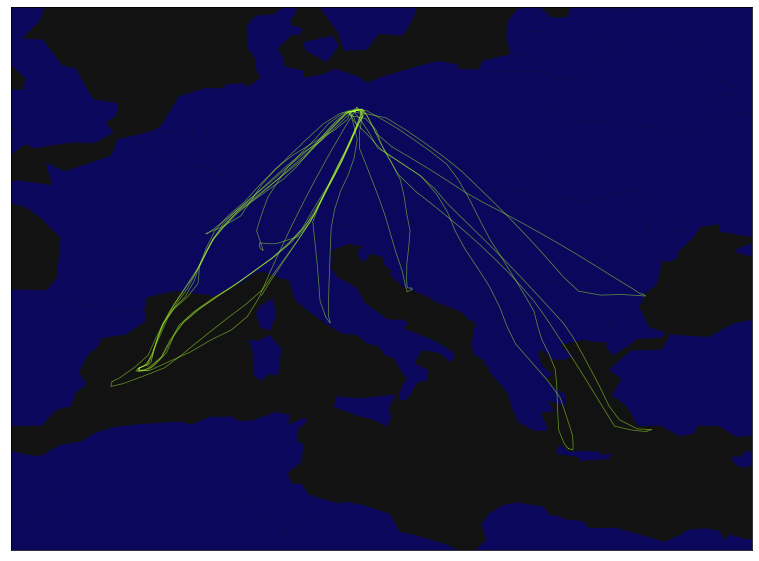

In [12]:
flight_map_tail('OE-IZD', save = False)

# Emissions model

In [13]:
metadata.aircraft_type_icao.value_counts()

A320    3025
A319    1161
A20N     563
A21N     136
GLEX       1
P68        1
Name: aircraft_type_icao, dtype: int64

In [35]:
def mode_times(metadata, begin , end) :

    metadata = metadata[(metadata['first_waypoint_time'] >= begin) & (metadata['last_waypoint_time'] < end)]

    t_climb, t_descent = [], []

    for i, id in enumerate(metadata['flight_id'], start = 1) :

        print(f'{i}/{len(metadata)} ...')
        clear_output(wait = True)

        wypts = waypoints.groupby('flight_id').get_group(id)

        threshold = 10
        flag_climb, flag_descent = True, True
        for i in range(2, len(wypts.time)-2):

            if (wypts.altitude_ft.iloc[i-1] < wypts.altitude_ft.iloc[i]) and abs(wypts.altitude_ft.iloc[i] - wypts.altitude_ft.iloc[i+1]) < threshold and abs(wypts.altitude_ft.iloc[i+1] - wypts.altitude_ft.iloc[i+2]) < threshold and flag_climb is True:
                t_climb.append(wypts.time.iloc[i])
                flag_climb = False

            if (wypts.altitude_ft.iloc[i+1] < wypts.altitude_ft.iloc[i]) and abs(wypts.altitude_ft.iloc[i] - wypts.altitude_ft.iloc[i-1]) < threshold and abs(wypts.altitude_ft.iloc[i-1] - wypts.altitude_ft.iloc[i-2]) < threshold and flag_descent is True:
                t_descent.append(wypts.time.iloc[i])
                flag_descent = False

        
        if flag_descent is True:
            t_descent.append(np.nan)

        if flag_climb is True:
            t_climb.append(np.nan)


    metadata['t_climb'] = t_climb
    metadata['t_descent'] = t_descent

    metadata['CLIMB_TIME'] = [(t_climb - first).total_seconds() / 60.0 for t_climb, first in zip(metadata.t_climb, metadata.first_waypoint_time)]
    metadata['CRUISE_TIME'] = [(t_descent - t_climb).total_seconds() / 60.0 for t_descent, t_climb in zip(metadata.t_descent, metadata.t_climb)]
    metadata['DESCENT_TIME'] = [(last - t_descent).total_seconds() / 60.0 for last, t_descent in zip(metadata.last_waypoint_time, metadata.t_descent)]

    metadata['CRUISE_TIME_norm'] = metadata.CRUISE_TIME / (metadata.duration_hours * 60)

    return metadata

In [31]:
metadata_05 = mode_times(metadata, datetime(2021, 7, 5), datetime(2021, 7, 6))
metadata_05.to_csv('metadata_05.csv', index = False)

616/616 ...


In [16]:
def altitude_plot(id) :

    flight = metadata.groupby('flight_id').get_group(id)
    tc = flight.t_climb.iloc[0]
    td = flight.t_descent.iloc[0]

    wypts = waypoints.groupby('flight_id').get_group(id)

    climb = wypts[wypts['time'] < tc]
    cruise = wypts[(wypts['time'] >= tc) & (wypts['time'] <= td)]
    descent = wypts[wypts['time'] > td]

    plt.scatter(climb.time, climb.altitude_ft, c = 'red')
    plt.scatter(cruise.time, cruise.altitude_ft, c = 'blue')
    plt.scatter(descent.time, descent.altitude_ft, c = 'green')

In [22]:
metadata_01.to_csv('metadata_01.csv', index = False)

In [36]:
dfs = []
for i in range(1, 8):
    print(i)
    dfs.append(pd.read_csv(f'metadata_0{i}.csv'))


df = pd.concat(dfs)

1
2
3
4
5
6
7


##### find cruise climb descent per flight

In [37]:
icao_address = df[['icao_address']].drop_duplicates()
icao_address

,icao_address
0,440309
1,440CB1
2,440175
3,44046D
4,44083C
...,...
211,40752F
62,40768B
117,440179
245,4072C8


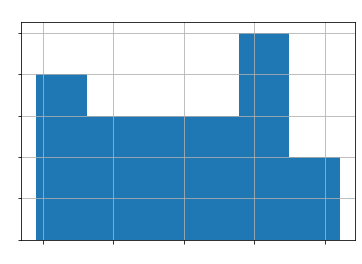

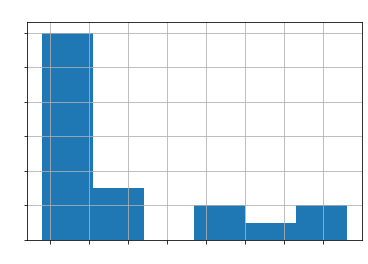

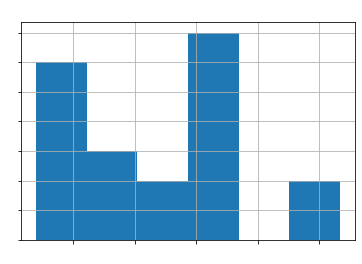

In [38]:
data = df[df['icao_address']=='440309']
data['climb'] = data['CLIMB_TIME'].dropna()
data['cruise'] = data['CRUISE_TIME'].dropna()
data['descent'] = data['DESCENT_TIME'].dropna()
for f in list(data)[-3:] :
    plt.figure()
    data[f].hist(bins = 6)
    plt.xticks(color = 'white'); plt.yticks(color = 'white')
    plt.title(f, color = 'white')

In [39]:
MEANCLIMB = []
MEANCRUISE = []
MEANDESCENT = []
for index, i in icao_address.iterrows():
    data = df[df['icao_address']==i['icao_address']]
    climb = data['CLIMB_TIME'].dropna()
    avgclimb = climb.mean()
    MEANCLIMB.append(avgclimb)
    cruise = data['CRUISE_TIME'].dropna()
    print(cruise)
    avgcruise = cruise.mean()
    MEANCRUISE.append(avgcruise)
    descent = data['DESCENT_TIME'].dropna()
    avgdescent = descent.mean()
    MEANDESCENT.append(avgdescent)

0      14.016667
113     8.683333
358    12.516667
526     4.000000
5       8.350000
139     8.316667
475     7.700000
646     9.000000
57      4.000000
160     8.316667
296    12.650000
474    42.983333
8      32.666667
140    23.983333
320     8.433333
442    28.300000
593     8.333333
734     8.200000
28      8.333333
136    42.633333
Name: CRUISE_TIME, dtype: float64
1       8.000000
135    14.000000
304    18.283333
396    34.916667
490    18.383333
582     8.500000
59     17.633333
159    38.983333
281    27.650000
390    13.983333
508    53.666667
652    18.333333
79     18.350000
208    23.983333
393    17.700000
590    32.750000
7      28.333333
123    28.966667
256     8.316667
402     4.000000
598    17.033333
723    13.333333
265     7.700000
371    18.266667
467    18.400000
572    18.316667
265     7.700000
371    18.266667
467    18.400000
572    18.316667
43     23.350000
137    23.366667
393    18.500000
497    19.033333
Name: CRUISE_TIME, dtype: float64
2      29.0333

Name: CRUISE_TIME, dtype: float64
78      9.316667
124    14.033333
259    18.233333
330     8.466667
452     7.933333
612     4.000000
86      8.433333
141     8.983333
232    13.350000
307     8.483333
625     8.466667
707     4.950000
119    17.750000
184     8.366667
283    23.966667
412    27.200000
385    23.316667
506     8.283333
682     4.000000
758     4.000000
809     4.333333
78      9.466667
156     8.233333
232    10.000000
304     8.716667
472     5.116667
538     4.250000
78      9.466667
156     8.233333
232    10.000000
304     8.716667
472     5.116667
538     4.250000
82      4.000000
133    13.983333
195     8.316667
Name: CRUISE_TIME, dtype: float64
79     17.666667
153     9.066667
309     8.933333
376     4.000000
571     8.983333
631     8.933333
153     3.333333
720     7.733333
771     4.300000
112    14.000000
309     4.000000
252    13.300000
382    14.983333
Name: CRUISE_TIME, dtype: float64
80     65.766667
272     8.366667
91      4.300000
441     4.0000

Name: CRUISE_TIME, dtype: float64
388     8.350000
560    13.983333
407     8.350000
620    13.250000
66     13.316667
195     7.700000
388     4.283333
494     4.000000
202     8.266667
309    18.350000
557     7.650000
611     5.033333
202     8.266667
309    18.350000
557     7.650000
611     5.033333
Name: CRUISE_TIME, dtype: float64
390    18.416667
489    12.966667
314    13.966667
432    23.983333
314    13.966667
432    23.983333
Name: CRUISE_TIME, dtype: float64
392     4.000000
500    14.566667
597    18.200000
274    17.700000
410    43.316667
559    34.000000
637    44.900000
26     12.683333
305    38.300000
501    17.750000
560     8.316667
686    27.800000
400    14.000000
498    18.350000
400    14.000000
498    18.350000
27     29.033333
154    13.350000
331    20.083333
402     4.000000
Name: CRUISE_TIME, dtype: float64
401     8.950000
514     4.666667
22     17.666667
160    17.666667
318    14.183333
395     8.366667
35      8.250000
161     8.333333
639     8.3333

In [47]:
icao_address['Average climb time'] = MEANCLIMB
icao_address['Average cruise time'] = MEANCRUISE
icao_address['Average descent time'] = MEANDESCENT
icao_address.describe()

,Average climb,Average cruise,Average descent,Average climb time,Average cruise time,Average descent time
count,227.000000,227.000000,228.000000,227.000000,227.000000,228.000000
mean,17.727642,15.419726,66.422102,17.727642,15.419726,66.422102
std,3.369320,5.394103,28.877328,3.369320,5.394103,28.877328
min,5.100000,4.000000,2.783333,5.100000,4.000000,2.783333
25%,15.942556,12.005682,46.284296,15.942556,12.005682,46.284296
50%,18.007215,14.790196,63.070847,18.007215,14.790196,63.070847
75%,19.720680,17.526944,80.419616,19.720680,17.526944,80.419616
max,45.900000,51.533333,180.913231,45.900000,51.533333,180.913231


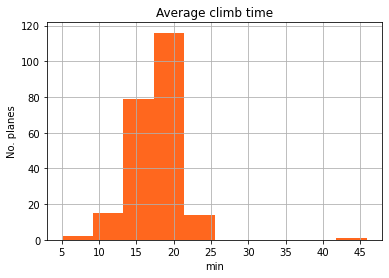

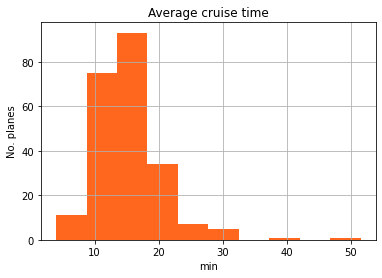

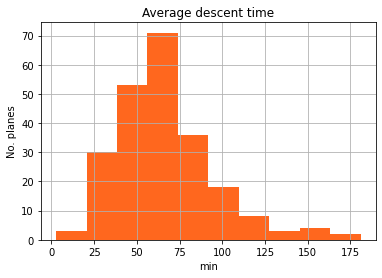

In [48]:
for f in list(icao_address)[-3:] :
    plt.figure()
    icao_address[f].hist(bins = 10, color = '#ff671e')
    plt.xticks(color = 'black'); plt.yticks(color = 'black')
    plt.title(f, color = 'black')
    plt.xlabel('min')
    plt.ylabel('No. planes')

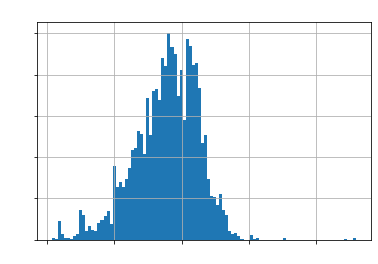

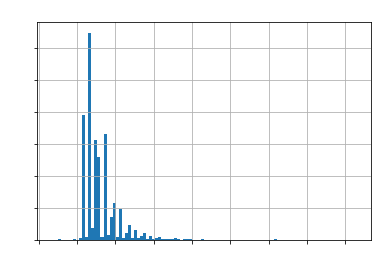

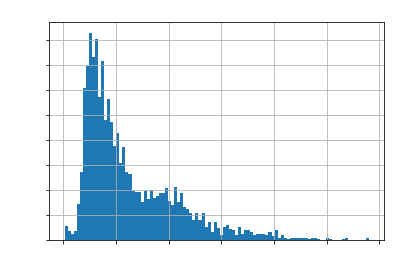

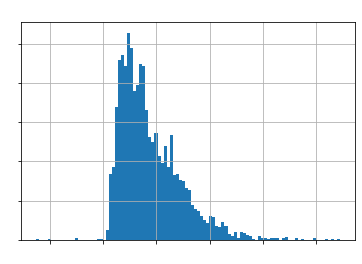

In [49]:
for f in list(df)[-4:] :

    plt.figure()
    df[f].hist(bins = 100, density = True)
    plt.xticks(color = 'white'); plt.yticks(color = 'white')
    plt.title(f, color = 'white')

In [50]:
m_dot = {'A320' : {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
         'A319' : {7: 0.095, 30: 0.266, 85: 0.818, 100: 1.002},
         'A20N' : {7: 0.116, 30: 0.349, 85: 1.043, 100: 1.284},
         'A21N' : {7: 0.024, 30: 0.067, 85: 0.173, 100: 0.205}}
m_dot

{'A320': {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 'A319': {7: 0.095, 30: 0.266, 85: 0.818, 100: 1.002},
 'A20N': {7: 0.116, 30: 0.349, 85: 1.043, 100: 1.284},
 'A21N': {7: 0.024, 30: 0.067, 85: 0.173, 100: 0.205}}

In [51]:
a = [m_dot.get(airtype) for airtype, t in zip(df['aircraft_type_icao'], df['CLIMB_TIME'])]
a

[{7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.095, 30: 0.266, 85: 0.818, 100: 1.002},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.095, 30: 0.266, 85: 0.818, 100: 1.002},
 {7: 0.095, 30: 0.266, 85: 0.818, 100: 1.002},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.116, 30: 0.349, 85: 1.043, 100: 1.284},
 {7: 0.102, 30: 0.316, 85: 0.939, 100: 1.142},
 {7: 0.102, 3

In [52]:
df['CO2_CLIMB'] = [m_dot.get(airtype).get(85) * 2 * (t * 60) * 3.15 for airtype, t in zip(df['aircraft_type_icao'], df['CLIMB_TIME'])]
df['CO2_DESCENT'] = [m_dot.get(airtype).get(30) * 2 * (t * 60) * 3.15 for airtype, t in zip(df['aircraft_type_icao'], df['DESCENT_TIME'])]
df['CO2_CRUISE'] = [m_dot.get(airtype).get(30) * 2 * (t * 60) * 3.15 for airtype, t in zip(df['aircraft_type_icao'], df['CRUISE_TIME'])]
df['CO2'] = df['CO2_CRUISE'] + df['CO2_CLIMB'] + df['CO2_DESCENT']
df['CO2_hour'] = df['CO2'] / df['duration_hours']
df['CO2_km'] = df['CO2'] / df['total_distance_km']

AttributeError: 'NoneType' object has no attribute 'get'

In [44]:
plt.figure(figsize = (8, 6))
plt.hist(df.CO2_km, bins = 100, density = True, color = 'midnightblue', edgecolor = 'lightgray')

plt.grid(alpha = 0.75, color = 'black', linestyle = ':')
plt.xticks(fontname = 'Times', size = 12)
plt.xlabel('kgCO2/km', fontname = 'Times', size = 18)
plt.yticks(fontname = 'Times', size = 12)
plt.ylabel('Frequency', fontname = 'Times', size = 18)
plt.xlim([5, 25])

plt.savefig('emissions_km_easyJet.jpeg', dpi = 400)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'CO2_km'

<Figure size 576x432 with 0 Axes>

In [45]:
df.CO2_km.mean()

AttributeError: 'DataFrame' object has no attribute 'CO2_km'

In [ ]:
os, ds, freq, lens, hrs = [], [], [], [], []
for o in set(metadata['origin_airport']): 
    for d in set(metadata['destination_airport']):

        if len(o) > 0 and len(d) > 0 :

            df = metadata[(metadata['origin_airport'] == o) & (metadata['destination_airport'] == d)]


            freq.append(len(df))
            os.append(o)
            ds.append(d)
            lens.append(df.total_distance_km.mean())
            hrs.append(df.duration_hours.mean())

In [ ]:
dict_names_o = dict(zip(metadata.origin_airport, metadata.origin_airport_name))
dict_names_d = dict(zip(metadata.destination_airport, metadata.destination_airport_name))

pairs = pd.DataFrame(zip(os, ds, freq, lens, hrs), columns = ['Origin', 'Destination', 'Frequency', 'Distance', 'Duration'])

pairs['Origin_name'] = [dict_names_o.get(o) for o in pairs.Origin]
pairs['Destination_name'] = [dict_names_d.get(d) for d in pairs.Destination]

In [ ]:
pairs.sort_values('Frequency', ascending = False).head(25)